In [7]:
import pandas as pd

df = pd.read_csv('exchange_rate.csv')
df


,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [5]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [9]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


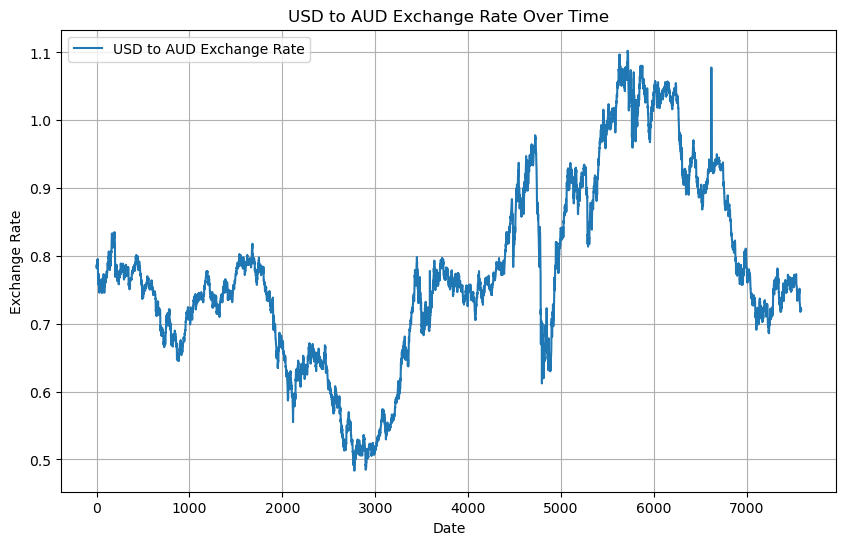

In [17]:
#Visualizations
# Plot the time series for USD to AUD exchange rates
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


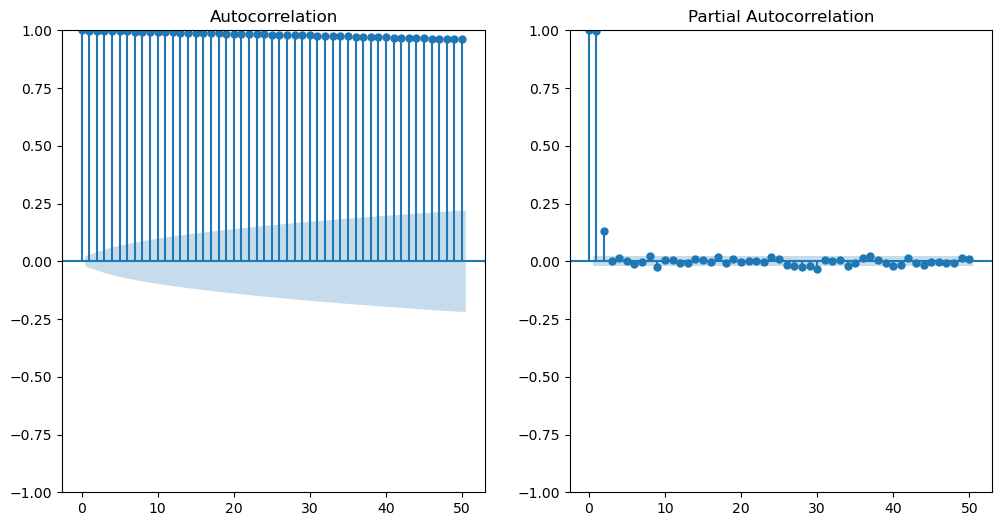

In [71]:
#Model Building - ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(df['Ex_rate'], lags=50, ax=plt.gca())
plt.subplot(122)
plot_pacf(df['Ex_rate'], lags=50, ax=plt.gca())
plt.show()


In [76]:
#Parameter Optimization for ARIMA
from pmdarima import auto_arima

# Fit the auto_arima model (with no seasonal component, you can add seasonality if needed)
model_auto_arima = auto_arima(df['Ex_rate'], seasonal=False, stepwise=True, trace=True)

# Print the summary of the fitted model
print(model_auto_arima.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-56098.154, Time=3.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-55972.211, Time=1.78 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-56102.338, Time=0.85 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-56100.772, Time=2.64 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-55974.195, Time=0.41 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-56100.340, Time=1.99 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-56100.341, Time=1.93 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-56098.328, Time=4.54 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-56104.319, Time=0.64 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-56102.321, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-56102.322, Time=3.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-56102.753, Time=0.75 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-56100.315, Time=1.96 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 24.189 sec

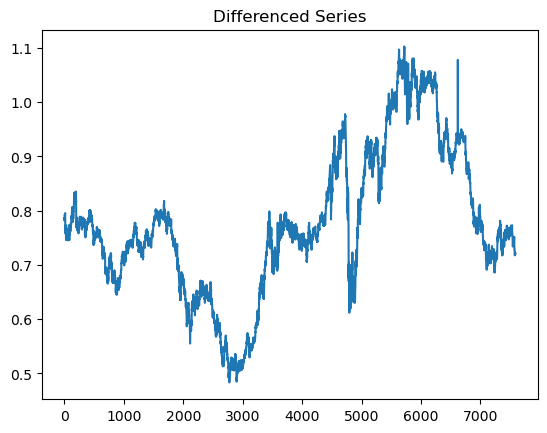

In [29]:
# Differencing the series to make it stationary
df['Ex_rate_diff'] = df['Ex_rate'].diff().dropna()

# Plot the differenced series
plt.plot(df['Ex_rate'])
plt.title('Differenced Series')
plt.show()


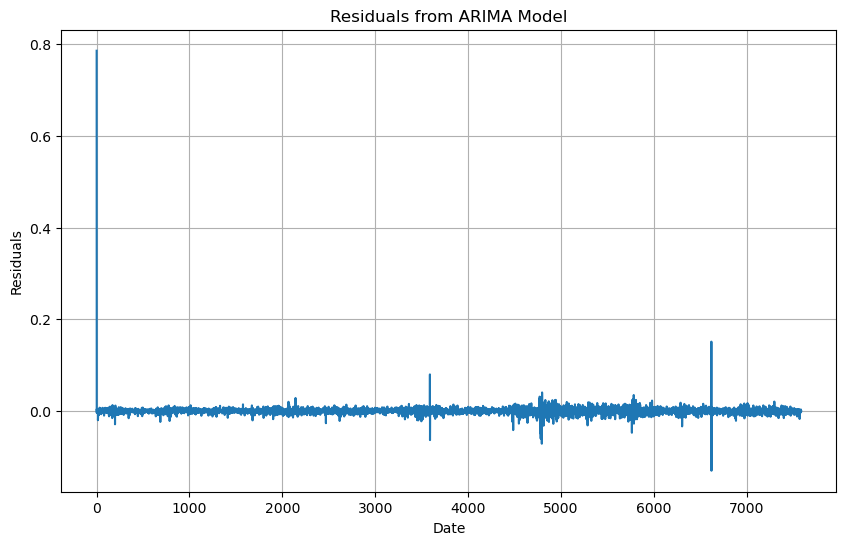

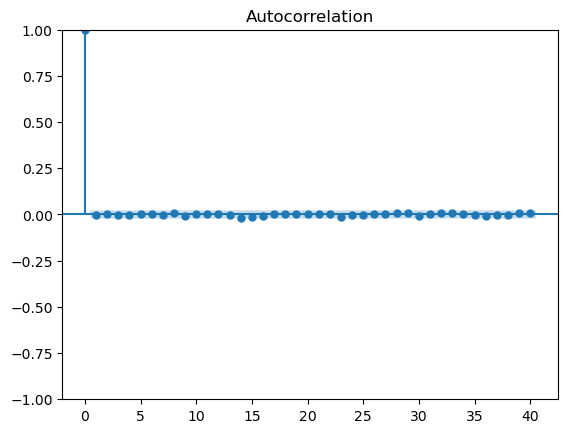

In [112]:
#Diagnostcis
# Plot residuals
residuals = model_arima_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Plot ACF of residuals
plot_acf(residuals, lags=40)
plt.show()


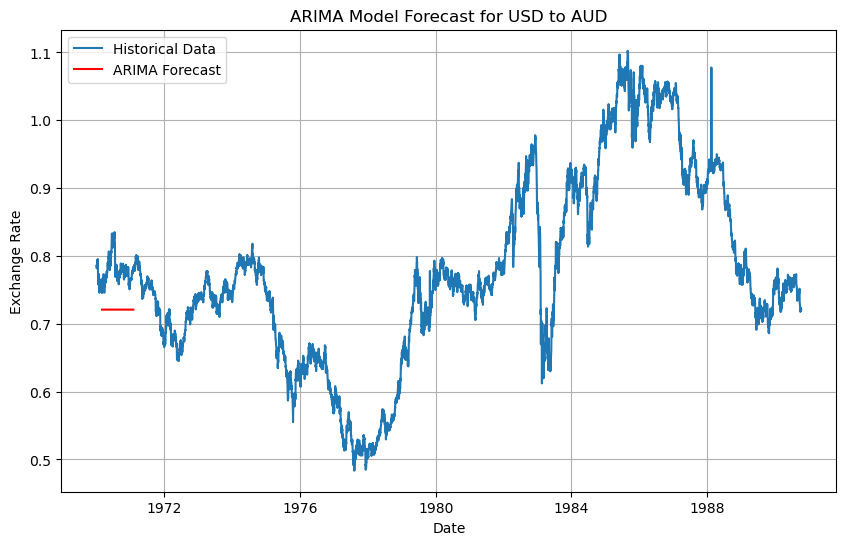

In [114]:
#Fo# Forecast for the next 12 months (or however long you need)
forecast_steps = 12
forecast_arima = model_arima_fit.forecast(steps=forecast_steps)

# Plot the forecast alongside actual values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical Data')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='ME')[1:], forecast_arima, label='ARIMA Forecast', color='red')
plt.title('ARIMA Model Forecast for USD to AUD')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


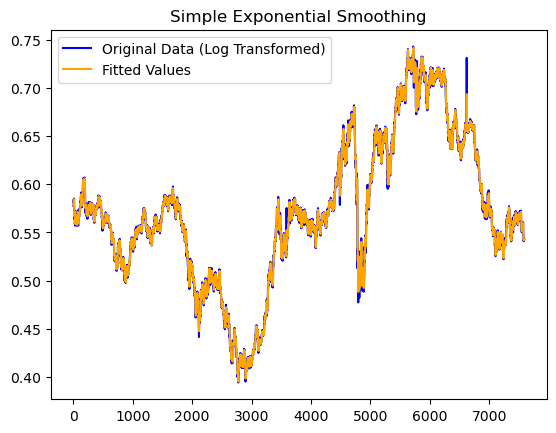

In [89]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Simple Exponential Smoothing (SES)
model_ses = ExponentialSmoothing(df['Ex_rate_log'], trend=None, seasonal=None)
model_ses_fit = model_ses.fit(smoothing_level=0.5)

# Plot the fitted values
plt.plot(df['Ex_rate_log'], label='Original Data (Log Transformed)', color='blue')
plt.plot(model_ses_fit.fittedvalues, label='Fitted Values', color='orange')
plt.legend()
plt.title('Simple Exponential Smoothing')
plt.show()


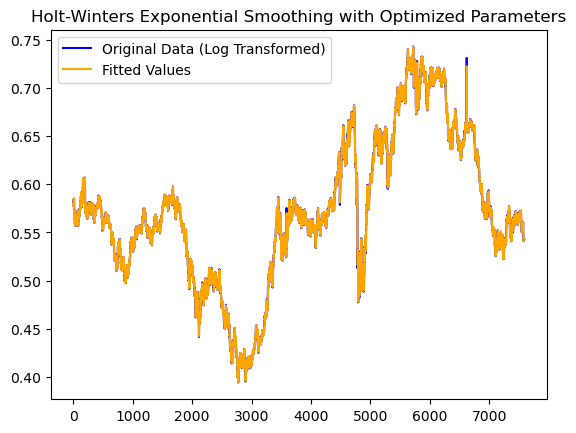

In [105]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Fit Holt-Winters Exponential Smoothing with automatic optimization of smoothing parameters
model_hw = ExponentialSmoothing(df['Ex_rate_log'], trend='add', seasonal='add', seasonal_periods=12)

# Fit the model with automatic optimization and a different optimization method
model_hw_fit = model_hw.fit(optimized=True, method='L-BFGS-B')

# Plot the original data (log transformed) and the fitted values
plt.plot(df['Ex_rate_log'], label='Original Data (Log Transformed)', color='blue')
plt.plot(model_hw_fit.fittedvalues, label='Fitted Values', color='orange')
plt.legend()
plt.title('Holt-Winters Exponential Smoothing with Optimized Parameters')
plt.show()


date            0
Ex_rate         0
Ex_rate_diff    1
Ex_rate_log     0
dtype: int64


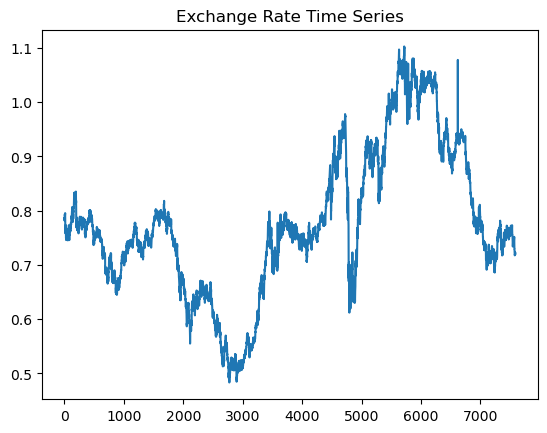

In [93]:
# Check for missing values
print(df.isnull().sum())

# Visualize the data for potential outliers
plt.plot(df['Ex_rate'])
plt.title('Exchange Rate Time Series')
plt.show()

# Optionally, remove outliers or replace missing values
df['Ex_rate'] = df['Ex_rate'].ffill()  # Forward fill missing values


C:\Users\mahes\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


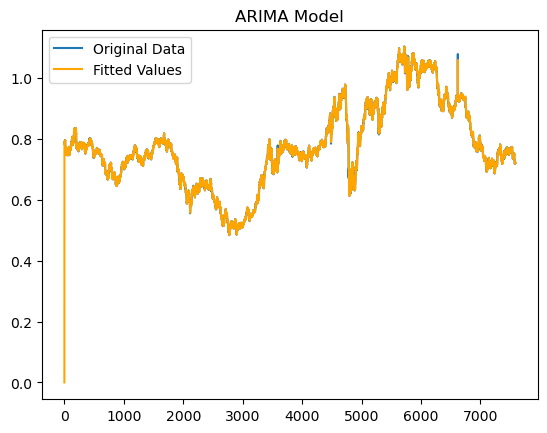

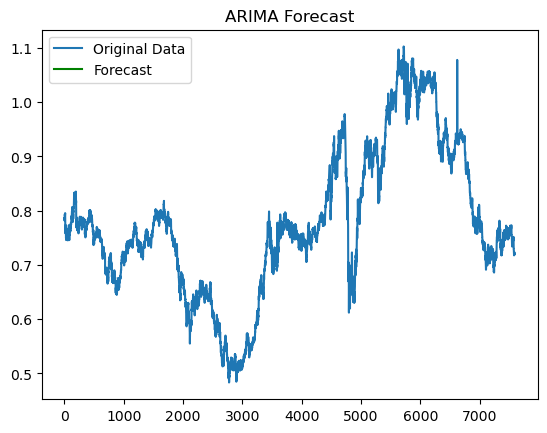

In [107]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model with (p=1, d=1, q=1) as an example37
model_arima = ARIMA(df['Ex_rate'], order=(1, 1, 1))
model_arima_fit = model_arima.fit()

# Plot the fitted values
plt.plot(df['Ex_rate'], label='Original Data')
plt.plot(model_arima_fit.fittedvalues, label='Fitted Values', color='orange')
plt.legend()
plt.title('ARIMA Model')
plt.show()

# Forecast the next 12 periods
forecast_arima = model_arima_fit.forecast(steps=12)

# Plot the forecast
plt.plot(df['Ex_rate'], label='Original Data')
plt.plot(range(len(df), len(df) + 12), forecast_arima, label='Forecast', color='green')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()


In [95]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMAX model (which is more flexible and allows maxiter)
model_sarimax = SARIMAX(df['Ex_rate'], order=(1, 1, 1))

# Fit the model with maxiter specified
model_sarimax_fit = model_sarimax.fit(method='lbfgs', maxiter=1000)

# Check the summary of the SARIMAX model
print(model_sarimax_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:               SARIMAX(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 09 Nov 2024   AIC                         -56102.322
Time:                        18:05:45   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

C:\Users\mahes\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:
#Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# If seasonality exists, we use Holt-Winters model, otherwise simple Exponential Smoothing
model_es = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)

# Fit the Exponential Smoothing model
model_es_fit = model_es.fit()

# Check the fitted model parameters
print(model_es_fit.params)


{'smoothing_level': 0.870094307182157, 'smoothing_trend': 1.3463331344114402e-19, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 0.7859050087281909, 'initial_trend': -6.3733371077766145e-06, 'initial_seasons': array([-0.00077567, -0.00073016, -0.00074517, -0.0004873 , -0.00052949,
       -0.00072735, -0.00104451, -0.00075972, -0.0009183 , -0.00077386,
       -0.00069176, -0.00097011]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [65]:
#Evaluation and Comparison

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming we have actual data for the forecasted period
# Replace 'actual_values' with the actual values for the forecasted period
actual_values = df['Ex_rate'][-forecast_steps:]

# ARIMA model evaluation
mae_arima = mean_absolute_error(actual_values, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(actual_values, forecast_arima))
mape_arima = np.mean(np.abs((actual_values - forecast_arima) / actual_values)) * 100

# Exponential Smoothing evaluation
mae_es = mean_absolute_error(actual_values, forecast_es)
rmse_es = np.sqrt(mean_squared_error(actual_values, forecast_es))
mape_es = np.mean(np.abs((actual_values - forecast_es) / actual_values)) * 100

print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}")
print(f"Exponential Smoothing - MAE: {mae_es}, RMSE: {rmse_es}, MAPE: {mape_es}")


ARIMA - MAE: 0.001664492434046964, RMSE: 0.002000358073456273, MAPE: nan
Exponential Smoothing - MAE: 0.0015735296032160135, RMSE: 0.0018697154515169602, MAPE: nan


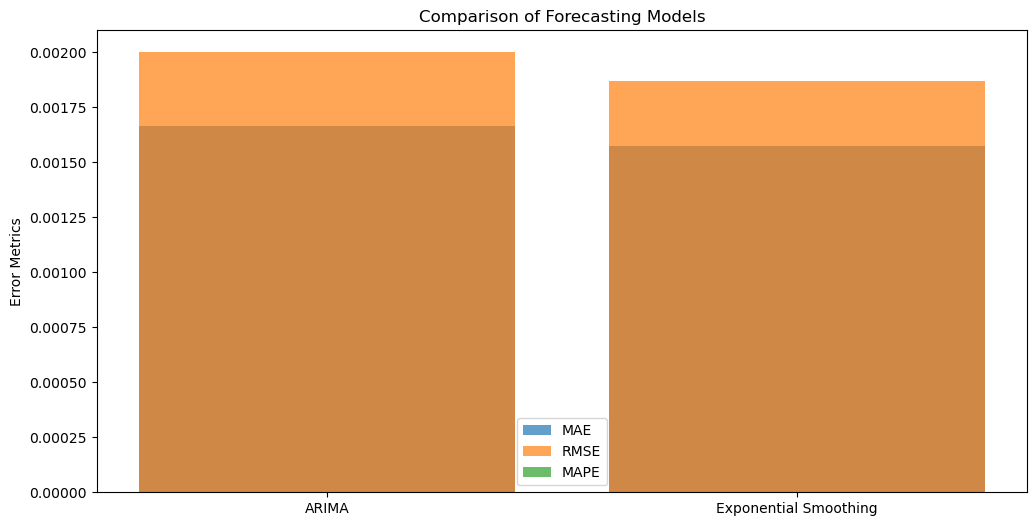

In [67]:
# You can visualize the error metrics for comparison
models = ['ARIMA', 'Exponential Smoothing']
mae = [mae_arima, mae_es]
rmse = [rmse_arima, rmse_es]
mape = [mape_arima, mape_es]

plt.figure(figsize=(12, 6))
plt.bar(models, mae, label='MAE', alpha=0.7)
plt.bar(models, rmse, label='RMSE', alpha=0.7)
plt.bar(models, mape, label='MAPE', alpha=0.7)
plt.title('Comparison of Forecasting Models')
plt.ylabel('Error Metrics')
plt.legend()
plt.show()
